# 🎶 ANÁLISIS Y VISUALIZACIÓN DE DATOS DE SPOTIFY (2018 - 2023)

---

📌 **Descripción**:  
En este proyecto se utilizó **Databricks**, donde primero creé mi *cluster*. También utilicé el portal de **Azure**, en el cual configuré **Storage Account** implementándole el servicio de **Data Lake Storage Gen2** para el almacenamiento de mi *dataset* en formato **CSV**.

---

📌 **Tecnologías Utilizadas**:
- ☁️ **Storage Account** con servicio de **Data Lake Storage Gen2**
- 👥 **Microsoft entra ID** (Azure active directory)
- 🔒 **Scope Secrets** y **Key Vault**
- 🐍 **PySpark** y **Python**
- 📊 Librerías **Matplotlib** y **Seaborn**

---

❓ **PREGUNTAS CLAVE DEL NEGOCIO**

🎧 ¿Sabes cuántas horas se escucharon en Spotify entre los años 2018 - 2023?

🎶 ¿Sabes cuántas transmisiones hubo entre los años 2020 - 2023?

💿 ¿Sabes qué álbumes fueron los más escuchados?

🎵 ¿Qué géneros fueron los más escuchados?

💳 ¿Qué tipos de plataformas fueron las más utilizadas? (Free vs Premium)

🎙️ ¿Qué artista fue el más escuchado por horas?

🌎 ¿Cuál fue el top 10 de países que más transmisiones realizaron?

🎵 ¿Sabes cuál es el promedio de Tasa de Salto (%) por artistas?

---

📌 **Filtros Dinámicos**:  
Utilice **Widgets** para hacer el análisis más interactivos y flexibles, permitiendo a los usuarios ingresar el año que quieran ver:

- **Ingreso de Año**:  
  Permite filtrar los datos por un año específico.
---

### 🔐 OBTENCIÓN DE CREDENCIALES Y AUTENTICACIÓN EN AZURE DATA LAKE
---

In [0]:
#Esto nos devuelve comandos para acceder al scope secret y key (Estos fueron configurados anteriormente).
dbutils.secrets.help()

Provides utilities for leveraging secrets within notebooks.
Databricks documentation for more info.
 get(scope: String, key: String): String -> Gets the string representation of a secret value with scope and key getBytes(scope: String, key: String): byte[] -> Gets the bytes representation of a secret value with scope and key list(scope: String): Seq -> Lists secret metadata for secrets within a scope listScopes: Seq -> Lists secret scopes

In [0]:
#Obtenemos el Scope secret
dbutils.secrets.listScopes()

[SecretScope(name='spotify-scope')]

In [0]:
#Obtenemos el Key secret.
dbutils.secrets.list(scope='spotify-scope')

[SecretMetadata(key='CliendId'),
 SecretMetadata(key='CliendSecret'),
 SecretMetadata(key='TenantId')]

In [0]:
# verdificamos que se hayan guardado mediante el get.
dbutils.secrets.get(scope='spotify-scope', key='CliendId')

'[REDACTED]'

In [0]:
dbutils.secrets.get(scope='spotify-scope', key='TenantId')

'[REDACTED]'

In [0]:
dbutils.secrets.get(scope='spotify-scope', key='CliendSecret')

'[REDACTED]'

In [0]:
#Guardamos nuestras credenciales.
cliend_id=dbutils.secrets.get(scope='spotify-scope', key='CliendId')
tenant_id=dbutils.secrets.get(scope='spotify-scope', key='TenantId')
cliend_secret=dbutils.secrets.get(scope='spotify-scope', key='CliendSecret')

In [0]:
#Nos conectamos a Azure Data Lake Storage.
spark.conf.set("fs.azure.account.auth.type.storagespotify2024.dfs.core.windows.net", "OAuth")
spark.conf.set("fs.azure.account.oauth.provider.type.storagespotify2024.dfs.core.windows.net", "org.apache.hadoop.fs.azurebfs.oauth2.ClientCredsTokenProvider")
spark.conf.set("fs.azure.account.oauth2.client.id.storagespotify2024.dfs.core.windows.net", cliend_id)
spark.conf.set("fs.azure.account.oauth2.client.secret.storagespotify2024.dfs.core.windows.net", cliend_secret)
spark.conf.set("fs.azure.account.oauth2.client.endpoint.storagespotify2024.dfs.core.windows.net", f"https://login.microsoftonline.com/{tenant_id}/oauth2/token")

### 🗂️ Estructura de Azure Blob File System (ABFS)

---
Para entender mejor aqui dejo como usar su estructura cuando ya tengan creado su contenedor y su storage account

📄 **Formato General:  abfs[s]://nombre_del_contenedor@nombre_del_Storage_account.core.windows.net/**




In [0]:
#Reemplazamos los nombres respecto a la estructura anteriormente explicada.
display(dbutils.fs.ls('abfss://file@storagespotify2024.dfs.core.windows.net/'))

path,name,size,modificationTime
abfss://file@storagespotify2024.dfs.core.windows.net/Spotify_2024_Global_Streaming_Data.csv,Spotify_2024_Global_Streaming_Data.csv,45242,1744344936000


In [0]:
#Llamamos a nuestro archivo y lo guardamos en un dataframe.
spotify_df=spark.read.option('header',True).csv('abfss://file@storagespotify2024.dfs.core.windows.net/Spotify_2024_Global_Streaming_Data.csv')
display(spotify_df.limit(10))


Country,Artist,Album,Genre,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%)
Germany,Taylor Swift,1989 (Taylor's Version),K-pop,2019,23.1,3695.53,14240.35,4.28,Free,118.51,2.24
Brazil,The Weeknd,After Hours,R&B,2022,60.6,2828.16,11120.44,3.9,Premium,44.87,23.98
United States,Post Malone,Austin,Reggaeton,2023,42.84,1425.46,4177.49,4.03,Free,19.46,4.77
Italy,Ed Sheeran,Autumn Variations,K-pop,2018,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12
Italy,Ed Sheeran,Autumn Variations,R&B,2023,7.89,3323.25,13446.32,4.47,Free,173.43,15.82
Sweden,Billie Eilish,Happier Than Ever,Indie,2019,37.65,1087.06,3298.09,4.37,Free,122.22,7.67
France,Bad Bunny,Nadie Sabe Lo Que Va a Pasar Mañana,Rock,2021,27.72,4630.69,17950.05,2.94,Premium,168.73,31.26
France,Doja Cat,Scarlet,Pop,2020,40.72,377.63,1633.73,3.63,Premium,43.31,20.47
Sweden,Bad Bunny,Nadie Sabe Lo Que Va a Pasar Mañana,K-pop,2019,25.42,2828.77,8558.4,3.67,Premium,73.04,39.9
United Kingdom,Ariana Grande,Eternal Sunshine,Rock,2018,75.82,4312.46,12099.39,2.82,Premium,119.69,16.01


In [0]:
#Traducimos los nombres de las columnas de nuesto dataframe.
spotify_rename_df=spotify_df.withColumnRenamed('Country', 'Pais') \
    .withColumnRenamed('Artist', 'Artista') \
    .withColumnRenamed('Album', 'Album') \
    .withColumnRenamed('Genre', 'Genero') \
    .withColumnRenamed('Release Year', 'Año') \
    .withColumnRenamed('Monthly Listeners (Millions)', 'Oyentes_mensuales_(millones)') \
    .withColumnRenamed('Total Streams (Millions)', 'Total_de_transmisiones_(millones)') \
    .withColumnRenamed('Total Hours Streamed (Millions)', 'Millones_de_horas_escuchadas') \
    .withColumnRenamed('Avg Stream Duration (Min)', 'Duracion_promedio_de_escucha_en_minutos') \
    .withColumnRenamed('Platform Type', 'Plataforma') \
    .withColumnRenamed('Streams Last 30 Days (Millions)', 'Transmisiones_de_los_últimos_30_días_(millones)') \
    .withColumnRenamed('Skip Rate (%)', 'Tasa_de_salto_%')

display(spotify_rename_df.limit(10))

Pais,Artista,Album,Genero,Año,Oyentes_mensuales_(millones),Total_de_transmisiones_(millones),Millones_de_horas_escuchadas,Duracion_promedio_de_escucha_en_minutos,Plataforma,Transmisiones_de_los_últimos_30_días_(millones),Tasa_de_salto_%
Germany,Taylor Swift,1989 (Taylor's Version),K-pop,2019,23.1,3695.53,14240.35,4.28,Free,118.51,2.24
Brazil,The Weeknd,After Hours,R&B,2022,60.6,2828.16,11120.44,3.9,Premium,44.87,23.98
United States,Post Malone,Austin,Reggaeton,2023,42.84,1425.46,4177.49,4.03,Free,19.46,4.77
Italy,Ed Sheeran,Autumn Variations,K-pop,2018,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12
Italy,Ed Sheeran,Autumn Variations,R&B,2023,7.89,3323.25,13446.32,4.47,Free,173.43,15.82
Sweden,Billie Eilish,Happier Than Ever,Indie,2019,37.65,1087.06,3298.09,4.37,Free,122.22,7.67
France,Bad Bunny,Nadie Sabe Lo Que Va a Pasar Mañana,Rock,2021,27.72,4630.69,17950.05,2.94,Premium,168.73,31.26
France,Doja Cat,Scarlet,Pop,2020,40.72,377.63,1633.73,3.63,Premium,43.31,20.47
Sweden,Bad Bunny,Nadie Sabe Lo Que Va a Pasar Mañana,K-pop,2019,25.42,2828.77,8558.4,3.67,Premium,73.04,39.9
United Kingdom,Ariana Grande,Eternal Sunshine,Rock,2018,75.82,4312.46,12099.39,2.82,Premium,119.69,16.01


###¿SABES CUÁNTAS HORAS SE ESCUCHARON EN SPOTIFY ENTRE LOS AÑOS 2018 - 2023? 🎧
---

In [0]:
#Librerias importadas.
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Obtenemos el total de horas escuchadas por año.
from pyspark.sql.functions import sum, round, col

año_df = spotify_rename_df \
    .groupBy('Año') \
    .agg(round(sum('Millones_de_horas_escuchadas'), 2).alias('Horas_escuchadas')).orderBy('Año', ascending=True)

display(año_df)

Año,Horas_escuchadas
2018,673150.07
2019,775743.97
2020,713329.4
2021,806878.91
2022,823165.02
2023,684917.07


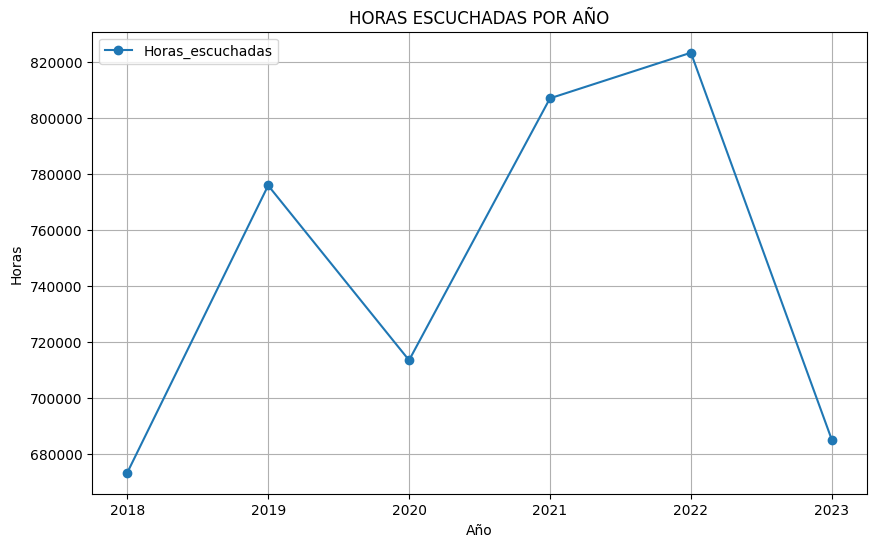

In [0]:
#Graficamos el total de horas escuchadas atravez de los años.
año_df.toPandas().plot(
    x='Año', 
    y='Horas_escuchadas', 
    marker='o', 
    figsize=(10, 6),
    grid=True
)
plt.title('HORAS ESCUCHADAS POR AÑO')
plt.xlabel('Año')
plt.ylabel('Horas')
plt.show()

###¿SABES CUÁNTAS TRANSMISIONES HUBO ENTRE LOS AÑOS 2020 - 2023? 🎶
---


In [0]:
from pyspark.sql.functions import sum, round, col

In [0]:
#Obtenemos el total de transmisiones por año.
transmisiones_df = spotify_rename_df \
    .groupBy('Año') \
    .agg(round(sum('Total_de_transmisiones_(millones)'), 0).alias('transmisiones')).orderBy('Año', ascending=False)

display(transmisiones_df)

Año,transmisiones
2023,194776.0
2022,245756.0
2021,230984.0
2020,208337.0
2019,218899.0
2018,191826.0


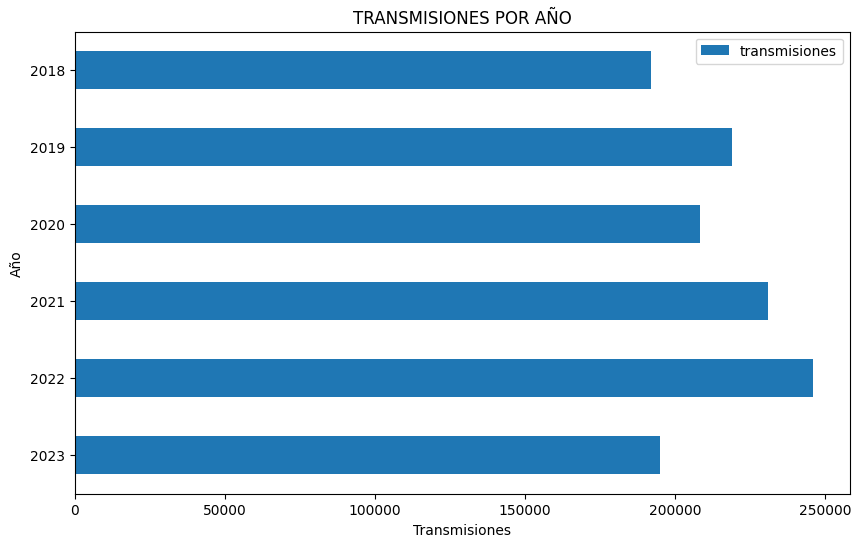

In [0]:
#Graficamos en barra horizontal el total de transmisiones por año.
transmisiones_df.toPandas().plot(kind='barh', x='Año', y='transmisiones', figsize=(10, 6))
plt.xlabel('Transmisiones')
plt.ylabel('Año')
plt.title('TRANSMISIONES POR AÑO')
plt.show()

### 📅 IMPLEMENTACIÓN DE WIDGETS PARA SELECCIÓN DE AÑO
---
📨 Incorporamos un widget que permita ingresar el año de forma dinámica entre los años 2018 al 2023, facilitando el ajuste de los análisis y reduciendo la complejidad del codigo.


In [0]:
# Crear un widget para ingresar el año.
dbutils.widgets.text("Año", "Escriba el Año")

# Guardar el valor del widget en una variable.
año_recibido = dbutils.widgets.get("Año")

### 🎵 ¿SABES QUÉ ÁLBUMES FUERON LOS MÁS ESCUCHADOS? 🎵
---
📅 Para continuar, te recomiendo ingresar un año entre **2018** y **2023** como prueba, para que los gráficos sean más dinámicos. 📈✨


In [0]:
#Los 10 albumes mas escuchados por año.
album_df = spotify_rename_df \
    .filter(spotify_rename_df.Año == año_recibido) \
    .groupBy('Album') \
    .agg(round(sum('Millones_de_horas_escuchadas'), 2).alias('Horas_escuchadas')).orderBy('Horas_escuchadas', ascending=False)

display(album_df)

Album,Horas_escuchadas
BORN PINK,129878.05
Nadie Sabe Lo Que Va a Pasar Mañana,84010.82
Scarlet,82292.9
Austin,67774.75
MAÑANA SERÁ BONITO,66903.05
For All The Dogs,55005.23
Proof,43244.45
Guts,42966.34
After Hours,42898.3
Future Nostalgia,41893.9


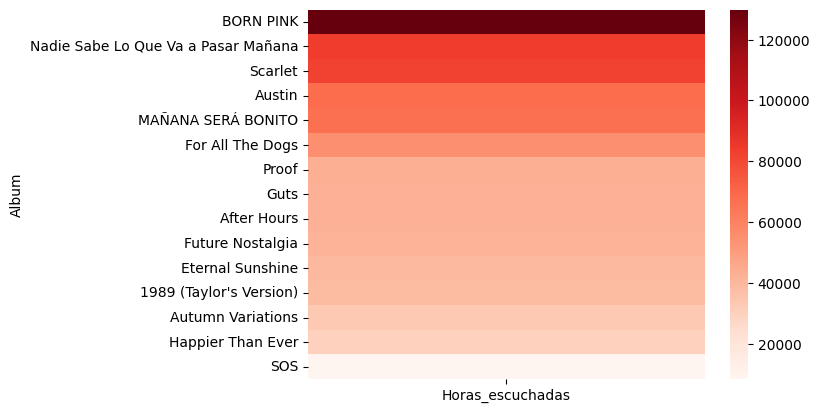

In [0]:
#Mapa de calor de los 10 albumes mas escuchados.
heamdmap_df=album_df.toPandas().set_index('Album')

sns.heatmap(heamdmap_df[['Horas_escuchadas']], cmap='Reds', cbar=True)
plt.show()

### 🎶 ¿QUÉ GENEROS FUERON LOS MÁS ESCUCHADOS? 🎶
---

In [0]:
genero_df = spotify_rename_df \
    .filter(spotify_rename_df.Año == año_recibido) \
    .groupBy('Genero') \
    .agg(round(sum('Millones_de_horas_escuchadas'), 0).alias('Horas_escuchadas')).orderBy('Horas_escuchadas', ascending=False)

display(genero_df)

Genero,Horas_escuchadas
EDM,127808.0
R&B,106745.0
Rock,86784.0
K-pop,84186.0
Indie,78070.0
Pop,77854.0
Hip Hop,77264.0
Reggaeton,71001.0
Classical,59299.0
Jazz,37868.0


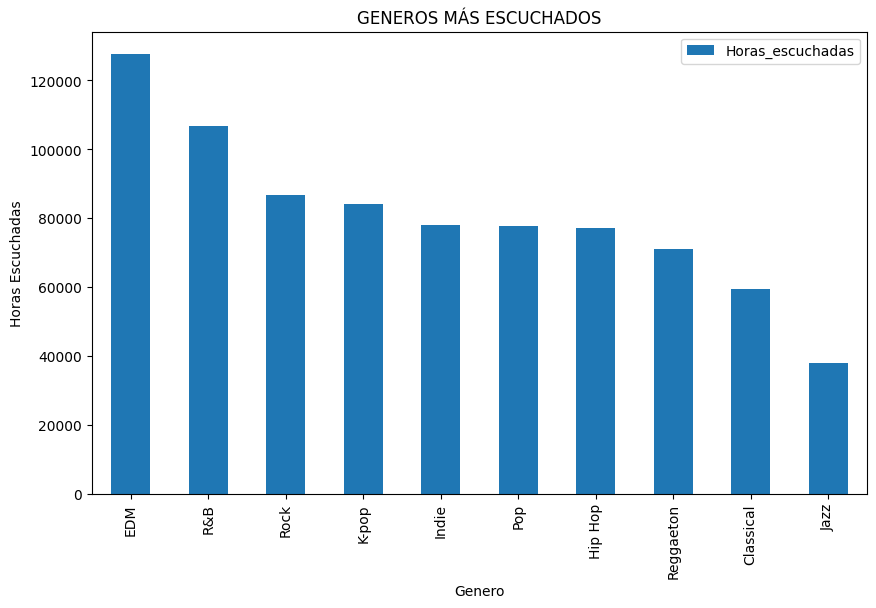

In [0]:
genero_df.toPandas().plot(kind='bar', x='Genero', y='Horas_escuchadas', figsize=(10, 6))
plt.xlabel('Genero')
plt.ylabel('Horas Escuchadas')
plt.title('GENEROS MÁS ESCUCHADOS')
plt.show()

### 🎶 ¿QUÉ TIPOS DE PLATAFORMAS FUERON LAS MÁS ESCUCHADAS (FREE VS PREMIUM)? 🎶
---

In [0]:
plataforma_df = spotify_rename_df \
    .filter(spotify_rename_df.Año == año_recibido) \
    .groupBy('Plataforma') \
    .agg(round(sum('Millones_de_horas_escuchadas'), 0).alias('Horas_escuchadas')).orderBy('Horas_escuchadas', ascending=False)

display(plataforma_df)

Plataforma,Horas_escuchadas
Free,449922.0
Premium,356957.0


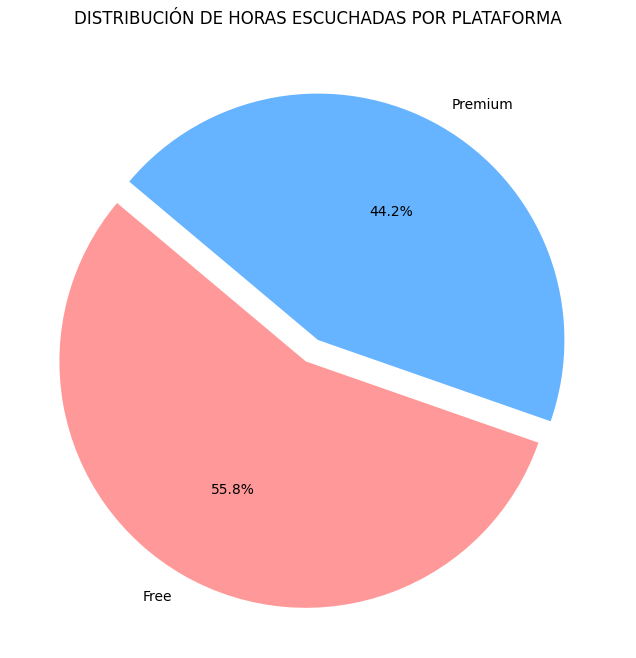

In [0]:
df_pandas = plataforma_df.toPandas()

labels = df_pandas['Plataforma']
sizes = df_pandas['Horas_escuchadas']

# Colores personalizados
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
explode = [0.1] + [0]*(len(sizes)-1)  

# Crear el gráfico
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('DISTRIBUCIÓN DE HORAS ESCUCHADAS POR PLATAFORMA')
plt.show()

### 🎶 ¿QUÉ ARTISTAS FUE EL MÁS ESCUCHADO POR HORAS? 🎶
---

In [0]:
artista_df = spotify_rename_df \
    .filter(spotify_rename_df.Año == año_recibido) \
    .groupBy('Artista') \
    .agg(round(sum('Millones_de_horas_escuchadas'), 0).alias('Horas_escuchadas')).orderBy('Horas_escuchadas', ascending=False)

display(artista_df)

Artista,Horas_escuchadas
BLACKPINK,129878.0
Bad Bunny,84011.0
Doja Cat,82293.0
Post Malone,67775.0
Karol G,66903.0
Drake,55005.0
BTS,43244.0
Olivia Rodrigo,42966.0
The Weeknd,42898.0
Dua Lipa,41894.0


Text(0.5, 1.0, 'ARTISTAS MÁS ESCUCHADOS')

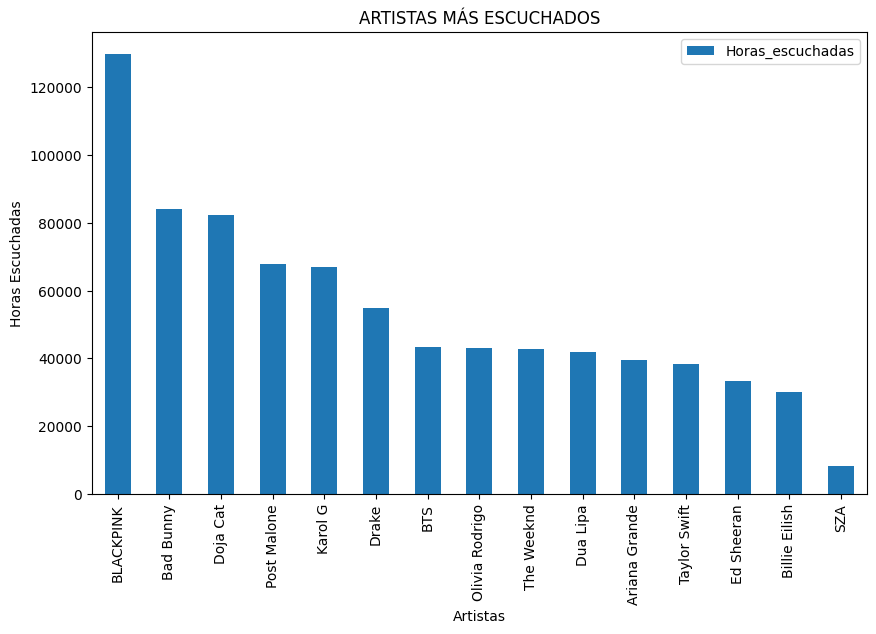

In [0]:
artista_df.toPandas().plot(kind='bar', x='Artista', y='Horas_escuchadas', figsize=(10, 6))
plt.xlabel('Artistas')
plt.ylabel('Horas Escuchadas')
plt.title('ARTISTAS MÁS ESCUCHADOS')

### 🎶 ¿CUÁL FUE EL TOP 10 DE PAÍSES CON MÁS TRANSMISIONES REALIZADAS? 🎶
---

In [0]:
#Obtenemos los 10 paises que mas emisiones realizo en Spotify
from pyspark.sql.functions import sum, round, col

pais_df = spotify_rename_df \
    .filter(spotify_rename_df.Año == año_recibido) \
    .groupBy('Pais') \
    .agg(round(sum('Total_de_transmisiones_(millones)'), 0).alias('transmisiones')).orderBy('transmisiones', ascending=False).limit(10)

display(pais_df)

Pais,transmisiones
South Korea,25819.0
Sweden,22373.0
Japan,19075.0
Germany,18044.0
France,17627.0
South Africa,14530.0
Brazil,13514.0
United Kingdom,11933.0
Argentina,11427.0
Australia,11351.0


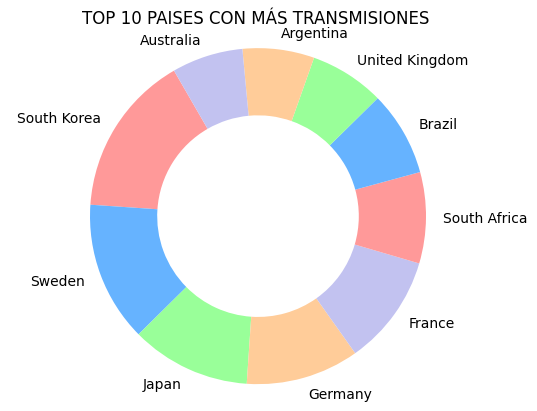

In [0]:

# Datos
dona=pais_df.toPandas()
labels = dona['Pais']
sizes = dona['transmisiones']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, colors=colors, wedgeprops={'width':0.4},startangle=120)
plt.title('TOP 10 PAISES CON MÁS TRANSMISIONES ')
ax.axis('equal')
plt.show()

### 🎵 ¿SABES CUÁL ES EL PROMEDIO **TASA DE SALTO (%)** POR ARTISTAS?
---
Para entender mejor es el porcentaje de veces que los usuarios comienzan a reproducir una canción 🎶 pero la **saltan** ⏭️ antes de que termine.  
Este indicador mide el **nivel de interés** o la **abandonabilidad** de una canción o artista.

✅ **Interpretación:**
- Una **tasa baja** (👂 menos saltos) indica que los usuarios disfrutan más la música.
- Una **tasa alta** (⏭️ muchos saltos) sugiere que la canción podría no estar captando la atención del público.



In [0]:
#Obtenemos los 10 paises que mas emisiones realizo en Spotify
from pyspark.sql.functions import sum, round, avg,col

salto_df = spotify_rename_df \
    .filter(spotify_rename_df.Año == año_recibido) \
    .groupBy('Artista') \
    .agg(round(avg('Tasa_de_salto_%'),0).alias('salto%')).orderBy('salto%', ascending=True)

display(salto_df)

Artista,salto%
SZA,12.0
BLACKPINK,16.0
Karol G,18.0
Olivia Rodrigo,20.0
Dua Lipa,21.0
Billie Eilish,22.0
Ed Sheeran,22.0
Drake,23.0
The Weeknd,23.0
Bad Bunny,24.0


Text(0.5, 1.0, 'ARTISTAS CON MÁS SALTOS% EN SUS CANCIONES')

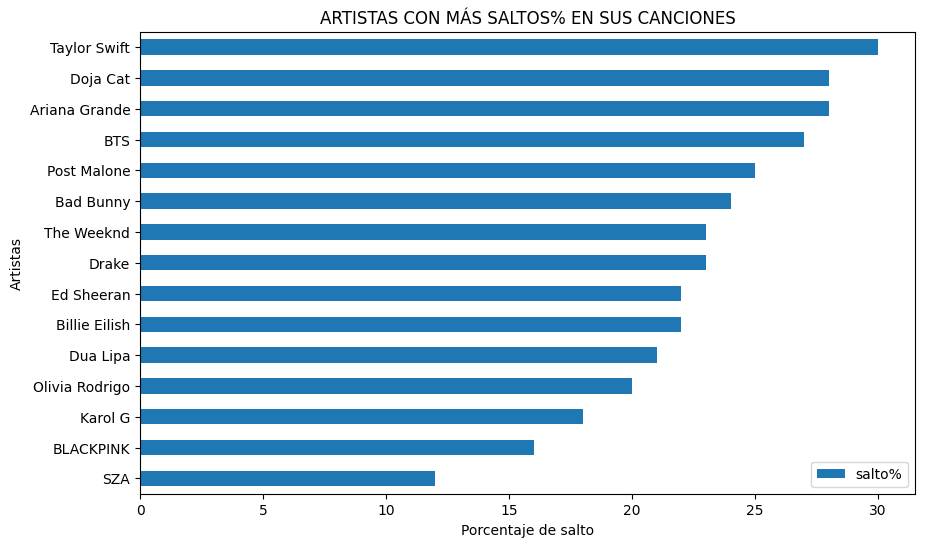

In [0]:
salto_df.toPandas().plot(kind='barh', x='Artista', y='salto%', figsize=(10, 6),)
plt.xlabel('Porcentaje de salto')
plt.ylabel('Artistas')
plt.title('ARTISTAS CON MÁS SALTOS% EN SUS CANCIONES')


### 🔍INSIGHTS ENCONTRADOS
---
✅ En 2018 se registró el menor consumo de música en la plataforma, con un total de 673,150.07 millones de horas escuchadas, mientras que en 2022 se alcanzó el nivel más alto, con 823,165.02 millones de horas escuchadas a nivel mundial.

✅ El año 2022 también fue el de mayor número de transmisiones a nivel global, alcanzando un total de 245,756 millones de reproducciones.

✅ El álbum más escuchado en el año 2020 fue Proof, con un total de 68,901.21 millones de horas escuchadas.

✅ En 2019, los géneros más populares por horas escuchadas fueron Classical con 168,340 millones de horas, seguido de K-pop con 129,008 millones. 

✅ En 2019, el 52.5% de las horas escuchadas provinieron de cuentas Premium (407,527 millones), mientras que el 47.5% correspondió a cuentas Free (368,216 millones).

✅ En 2021, el artista más escuchado fue BLACKPINK, con un total de 129,878 millones de horas escuchadas.

✅ En el año 2023, los países que realizaron más transmisiones en la plataforma fueron Suecia, con 18,856 millones, y Japón, con 18,556 millones.


### 📝JUSTIFICACIÓN
---
El uso de una Storage Account con el servicio de Azure Data Lake Gen2 Storage lo utilicé para almacenar y practicar el uso de este servicio. También implementé Scope Secrets y Key Vault para brindar mayor seguridad en el acceso a mis datos, en este caso protegiendo el archivo CSV.

Para finalizar, explicaré por qué utilicé widgets: me parece más dinámico ingresar los años a través de ellos, además de que ayudan a reducir la complejidad del código y se podrian obtener más insights.


###👋 DESPEDIDA
---
Espero que este proyecto les haya sido útil.
Próximamente estaré subiendo nuevos proyectos, donde iré incorporando nuevas ideas.
Este trabajo forma parte de mi proceso para seguir fortaleciendo mis habilidades y poner en práctica lo aprendido.

¡Los animo a que también creen sus propios proyectos y sigan aprendiendo! 🚀

